<a href="https://colab.research.google.com/github/JUANBECERRIL003/EDP-2/blob/main/MetExplc%C3%ADto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación de onda (Método Explícito)

Resolvemos el problema hiperbólico:
$$\frac{\partial^2 u}{\partial t^2} = 4 \frac{\partial^2 u}{\partial x^2}$$

Con condiciones:
* $u(0,t) = u(1,t) = 0$
* $u(x,0) = \sin(\pi x)$
* $u_t(x,0) = 0$

Usamos el esquema explícito de diferencias finitas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tabulate import tabulate

#Parámetros: alpha es la velocidad de la onda. L es la longitud de la cuerda y T_max es el tiempo máximo
alpha = 2.0
L = 1.0
T_max = 1.0
dx = 0.1 # h
dt = 0.05 # k
lam = (alpha * dt) / dx

M = int(L / dx) + 1       # Número de puntos en x (0.0 a 1.0 son 11 puntos)
N = int(T_max / dt) + 1   # pasos

x_arr = np.linspace(0, L, M)
t_arr = np.linspace(0, T_max, N)

print(f"Alpha: {alpha}")
print(f"Lambda: {lam}")
print(f"Puntos en x: {M}, Pasos de tiempo: {N}")

Alpha: 2.0
Lambda: 1.0
Puntos en x: 11, Pasos de tiempo: 21


In [3]:
#Condiciones Iniciales y Exacta

def f_inicio(x):
    return np.sin(np.pi * x) #u(x,0) = sin(pi*x)

def g_velocidad(x):
    return 0.0 # Velocidad inicial: u_t(x,0) = 0

def solucion_exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

### Implementación del Método Explícito

Para resolver la ecuación numéricamente, discretizamos el dominio. Debido a que la ecuación de onda es de segundo orden en el tiempo, necesitamos un tratamiento especial para el primer paso.

**1. Primer paso de tiempo ($t=1$):**
Como dependemos de $u(x, t-\Delta t)$ y en el inicio no existe un tiempo negativo, utilizamos la condición de velocidad inicial $u_t(x,0) = 0$ para derivar una fórmula especial:

$$u_i^1 = (1-\lambda^2)u_i^0 + \frac{\lambda^2}{2}(u_{i+1}^0 + u_{i-1}^0)$$

**2. Pasos subsiguientes ($t > 1$):**
Para el resto de la simulación, utilizamos el esquema explícito estándar centrado:

$$u_i^{j+1} = 2(1-\lambda^2)u_i^j + \lambda^2(u_{i+1}^j + u_{i-1}^j) - u_i^{j-1}$$

Donde $\lambda = \frac{\alpha \Delta t}{\Delta x}$ es el número de Courant.

In [8]:
def onda_explicito(M, N, lam, x_arr):
    """
    Aquí empiezaré a implementar el método explícito.
    Matriz U: Filas = tiempo, Columnas = espacio"""
    U = np.zeros((N, M))

    #Condición Inicial
    for i in range(M):
        U[0, i] = f_inicio(x_arr[i])

    """
    Primer paso de tiempo (t=1)
    usando la fórmula de derivada de u_t = 0"""
    for i in range(1, M-1):
        #aploicando la fórmula de arriba
        U[1, i] = (1 - lam**2) * U[0, i] + 0.5 * lam**2 * (U[0, i+1] + U[0, i-1])

    """Resto de pasos (t > 1)
    usando la fórmula recursiva estándar"""
    for j in range(1, N-1):       # Tiempo actual (j), calculamos futuro (j+1)
        for i in range(1, M-1):   # Espacio
            # Aplicamos la segunda fórmula (esquema explícito)
            term1 = 2 * (1 - lam**2) * U[j, i]
            term2 = lam**2 * (U[j, i+1] + U[j, i-1])
            term3 = U[j-1, i]     # El pasado
            U[j+1, i] = term1 + term2 - term3
    return U
#Ejecutamos la simulación
U_res = onda_explicito(M, N, lam, x_arr)
print("Cálculo completado.")

Cálculo completado.


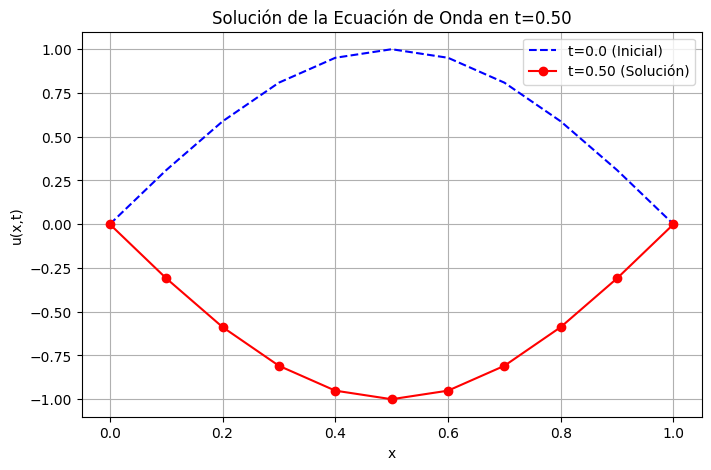

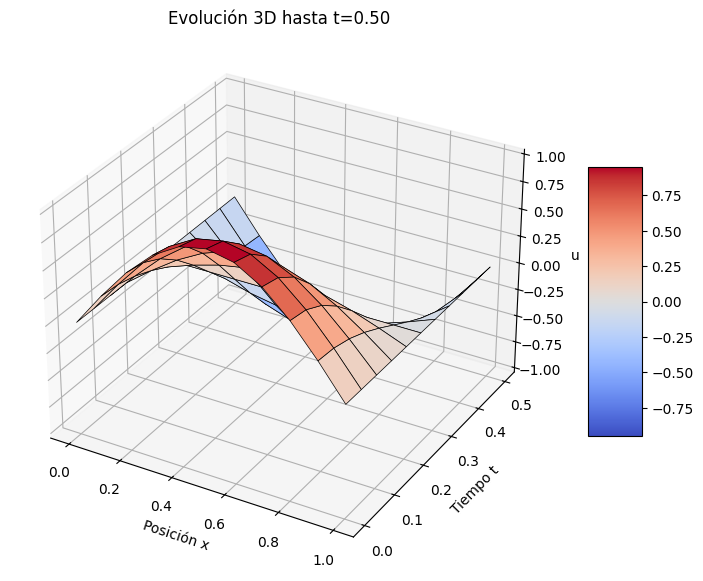

In [9]:
#Ejercicio 1. Gráficas 2D y 3D (hasta t=0.50)

""" Paso 10, t = 10 * 0.05 = 0.50"""
indice_t50 = 10

#Gráfica 2D
plt.figure(figsize=(8, 5))
plt.plot(x_arr, U_res[0], 'b--', label='t=0.0 (Inicial)')
plt.plot(x_arr, U_res[indice_t50], 'r-o', label=f't={t_arr[indice_t50]:.2f} (Solución)')
plt.title('Solución de la Ecuación de Onda en t=0.50')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True)
plt.legend()
plt.show()

#Gráfica 3D
"""Solo tomamos los datos hasta el índice 10 para la gráfica 3D"""
U_recorte = U_res[:indice_t50+1, :]
T_recorte, X_recorte = np.meshgrid(t_arr[:indice_t50+1], x_arr)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
#Transponemos U_recorte para que coincida con el meshgrid (X, T)
surf = ax.plot_surface(X_recorte, T_recorte, U_recorte.T, cmap=cm.coolwarm, edgecolor='k', linewidth=0.5)
ax.set_title('Evolución 3D hasta t=0.50')
ax.set_xlabel('Posición x')
ax.set_ylabel('Tiempo t')
ax.set_zlabel('u')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Comparación en el paso 20 (t=1.00):
         x    Numérica    Tabla 12.6    Err(Tabla)      Exacta    Err(Exacta)
----------  ----------  ------------  ------------  ----------  -------------
0.00000000  0.00000000    0.00000000    0.00000000  0.00000000     0.00000000
0.10000000  0.30901699    0.30901699    0.00000000  0.30901699     0.00000000
0.20000000  0.58778525    0.58778525    0.00000000  0.58778525     0.00000000
0.30000000  0.80901699    0.80901699    0.00000000  0.80901699     0.00000000
0.40000000  0.95105652    0.95105652    0.00000000  0.95105652     0.00000000
0.50000000  1.00000000    1.00000000    0.00000000  1.00000000     0.00000000
0.60000000  0.95105652    0.95105652    0.00000000  0.95105652     0.00000000
0.70000000  0.80901699    0.80901699    0.00000000  0.80901699     0.00000000
0.80000000  0.58778525    0.58778525    0.00000000  0.58778525     0.00000000
0.90000000  0.30901699    0.30901699    0.00000000  0.30901699     0.00000000
1.00000000  0.00000000    0.

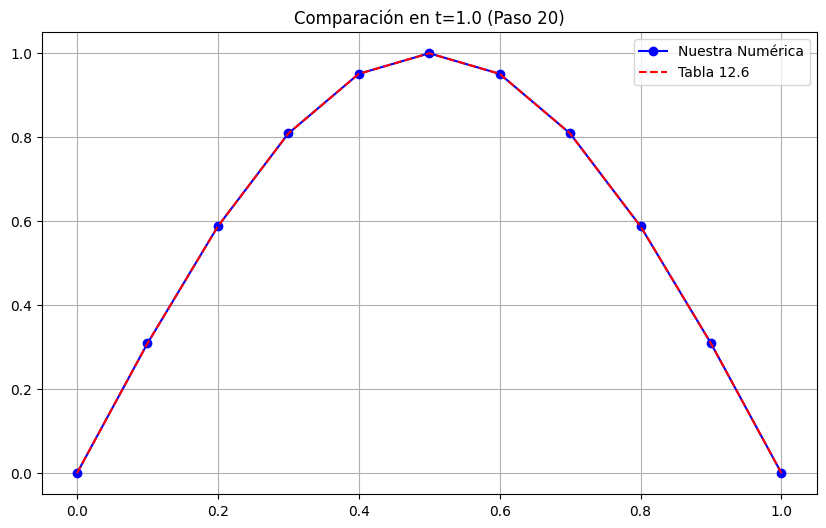

In [12]:
#Ejercicios 2 y 3. Comparación con la tabla 12.6 y exacta

""" El paso 20, t = 1.0"""
idx_t1 = 20
t_eval = t_arr[idx_t1]

u_numerica = U_res[idx_t1] #solución numérica


tabla_12_6 = [
    0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944, 0.9510565163,
    1.0000000000, 0.9510565163, 0.8090169944, 0.5877852523, 0.3090169944,
    0.0000000000
]
"""
son los valores que ya vienen en la tabla

#Calculando la solución exacta en ese tiempo"""
u_exacta = solucion_exacta(x_arr, t_eval)
#para la tabla
datos_tabla = []
for i in range(len(x_arr)):
    err_tabla = abs(u_numerica[i] - tabla_12_6[i])
    err_exacta = abs(u_numerica[i] - u_exacta[i])
    fila = [
        x_arr[i],
        u_numerica[i],
        tabla_12_6[i],
        err_tabla, # Error vs tabla
        u_exacta[i],
        err_exacta # Error vs exacta
    ]
    datos_tabla.append(fila)
headers = ["x", "Numérica", "Tabla 12.6", "Err(Tabla)", "Exacta", "Err(Exacta)"]
print(f"Comparación en el paso {idx_t1} (t={t_eval:.2f}):")
print(tabulate(datos_tabla, headers=headers, floatfmt=".8f"))

#error
plt.figure(figsize=(10, 6))
plt.plot(x_arr, u_numerica, 'bo-', label='Nuestra Numérica')
plt.plot(x_arr, tabla_12_6, 'r--', label='Tabla 12.6')
#La exacta se verá igual, así que graficaremos el error
plt.title(f'Comparación en t={t_eval:.1f} (Paso 20)')
plt.grid(True)
plt.legend()
plt.show()

### Para el ejercicio 3

Al observar la gráfica comparativa y la tabla de errores, notamos algo interesante: **la coincidencia es perfecta**.

* **Observación:** La solución numérica (puntos azules) se superpone exactamente a los valores de referencia y a la solución analítica.
* **Causa:** Esto sucede porque el número de Courant es exactamente $\lambda = 1$.
   $$\lambda = \frac{\alpha \Delta t}{\Delta x} = \frac{2(0.05)}{0.1} = 1.0$$
* **Conclusión:** Para la ecuación de onda 1D discretizada con diferencias centrales, cuando $\lambda = 1$, el esquema numérico propaga la solución sin error de dispersión ni disipación. El error observado en la tabla (del orden de $10^{-16}$) es despreciable y se debe únicamente a la precisión de punto flotante de la máquina, no al método en sí.

In [13]:
#Ejercicio 4
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x_arr, U_res[0], lw=2, color='purple', label='Onda')
#límites d e la onda, estos van de -1 a 1
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('Posición x')
ax.set_ylabel('u(x, t)')
title = ax.set_title(f'Tiempo t = {0.0:.2f}')
ax.grid(True)
ax.legend()
def update(k):
    line.set_ydata(U_res[k])
    title.set_text(f'Tiempo t = {t_arr[k]:.2f}')
    return line, title
""" para la animación"""
anim = FuncAnimation(fig, update, frames=len(t_arr), interval=100, blit=True)
writer = PillowWriter(fps=10)
anim.save("animacion_onda.gif", writer=writer)
plt.close(fig)

print("¡Animación de onda guardada!")

¡Animación de onda guardada!
